In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
df = pd.read_csv('.\ds_titanic.csv')

In [39]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.shape

(891, 12)

In [41]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

EDAD DE LOS PASAJEROS

<AxesSubplot:>

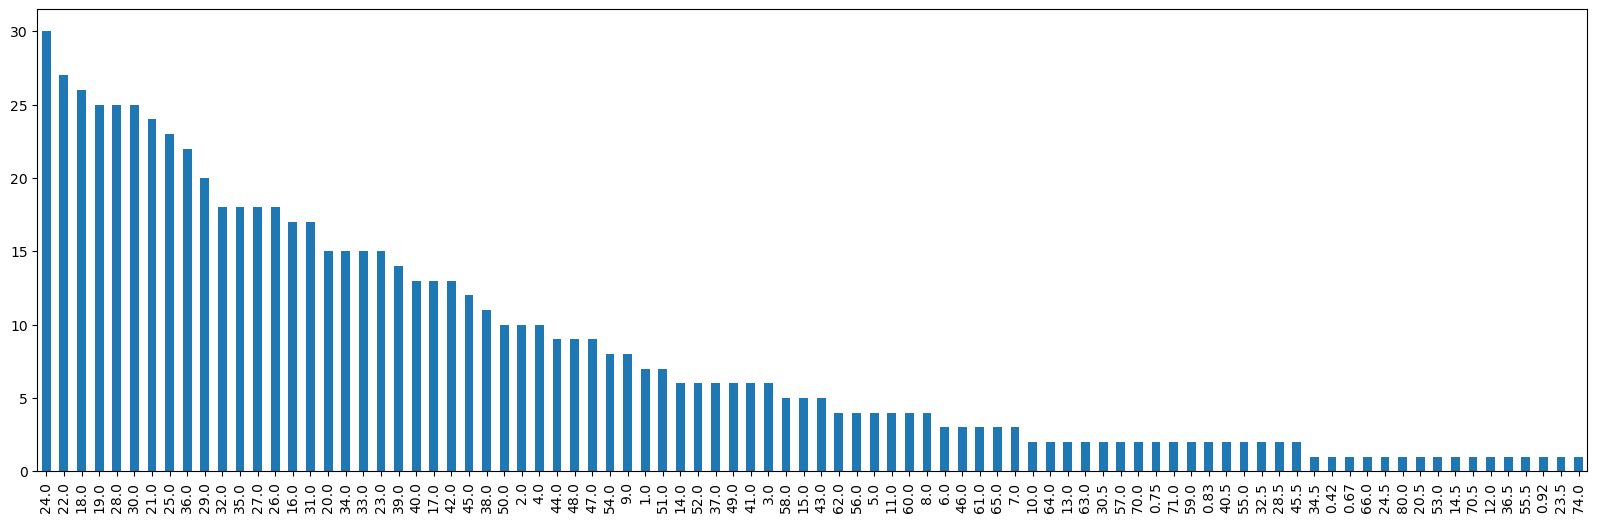

In [104]:
passenggers_age =df['Age'].value_counts()
passenggers_age.plot(kind='bar')

SEXO DE LOS PASAJEROS 

<AxesSubplot:ylabel='Sex'>

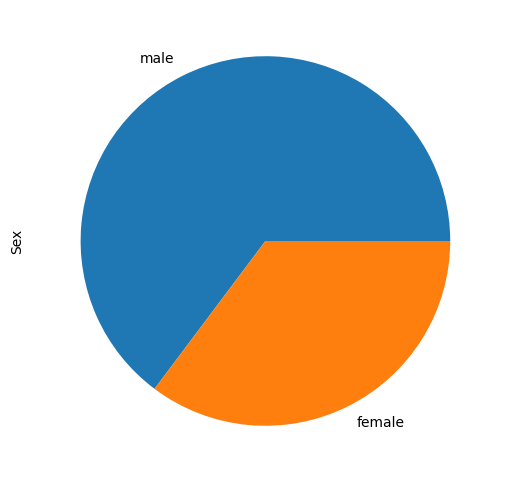

In [98]:
passenggers_sex =df['Sex'].value_counts()
passenggers_sex.plot(kind='pie')

CLASE DE LOS PASAJEROS

<AxesSubplot:>

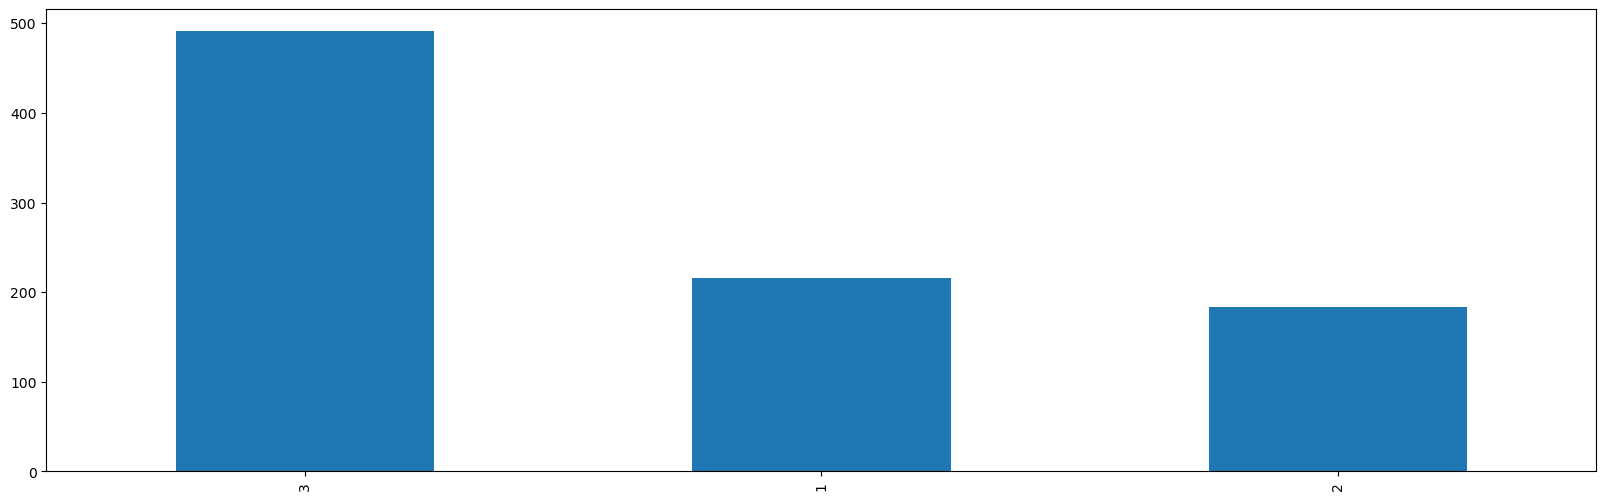

In [112]:
passenggers_class= df['Pclass'].value_counts()
passenggers_class.plot(kind='bar')

In [101]:
df['Survived'] = np.where(df['Survived'] == 1,'Survived','Deceased')

<AxesSubplot:ylabel='Survived'>

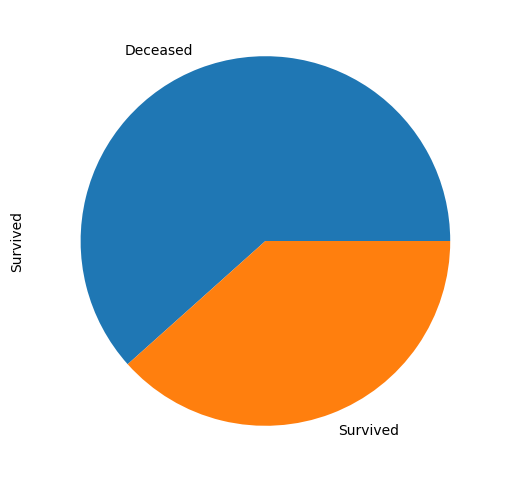

In [100]:
survivors=df['Survived'].value_counts()
survivors.plot(kind='pie')

<AxesSubplot:xlabel='Survived,Sex'>

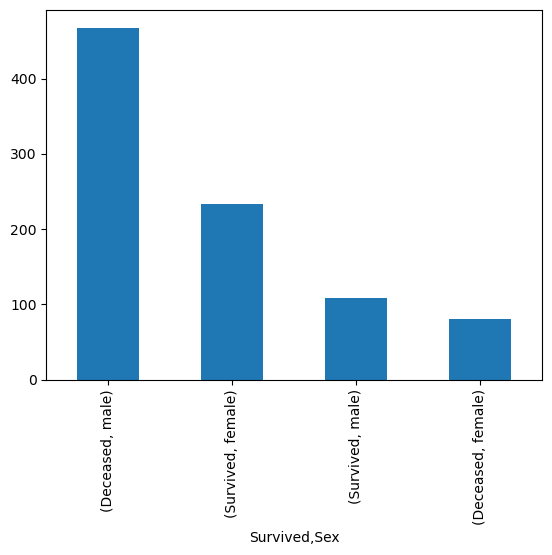

In [57]:
sex_survivors= df.groupby('Survived')[['Sex']].value_counts().sort_values(ascending= False)
sex_survivors.plot(kind='bar')

<AxesSubplot:xlabel='Survived,Pclass'>

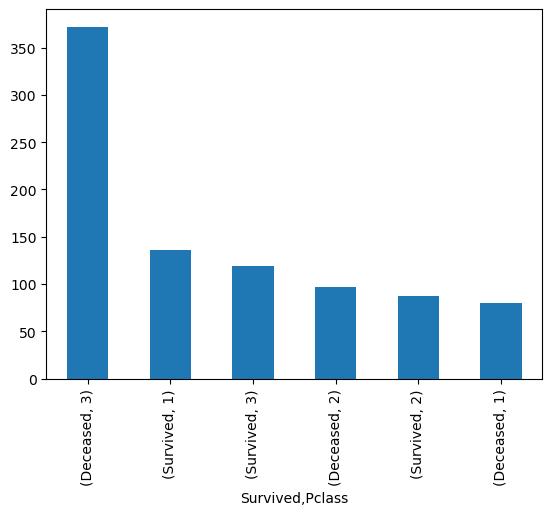

In [65]:
class_survivors = df.groupby('Survived')[['Pclass']].value_counts().sort_values(ascending= False)
class_survivors.plot(kind='bar')

<AxesSubplot:xlabel='Pclass'>

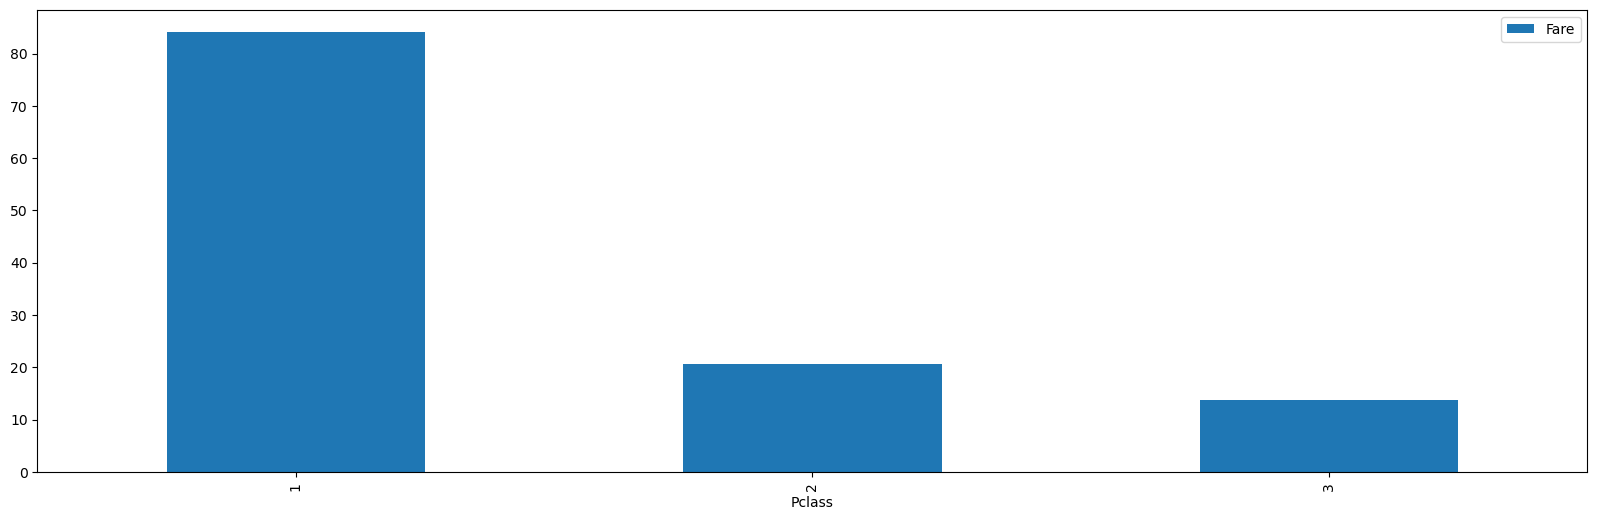

In [81]:
class_fare =df.groupby('Pclass')[['Fare']].mean().sort_values(by='Fare', ascending=False)
class_fare.plot(kind='bar')

<AxesSubplot:>

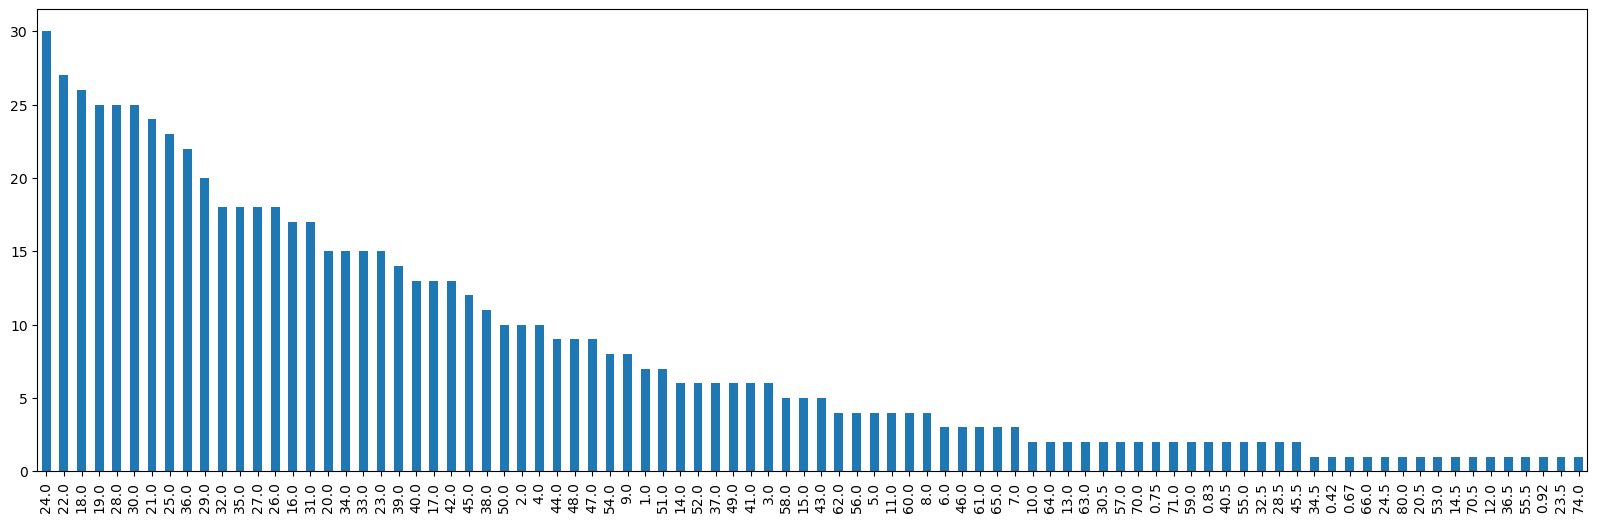

# NULL VALUES

In [77]:
df.isnull().sum().sort_values(ascending= False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Text(0.5, 1.0, 'Null values')

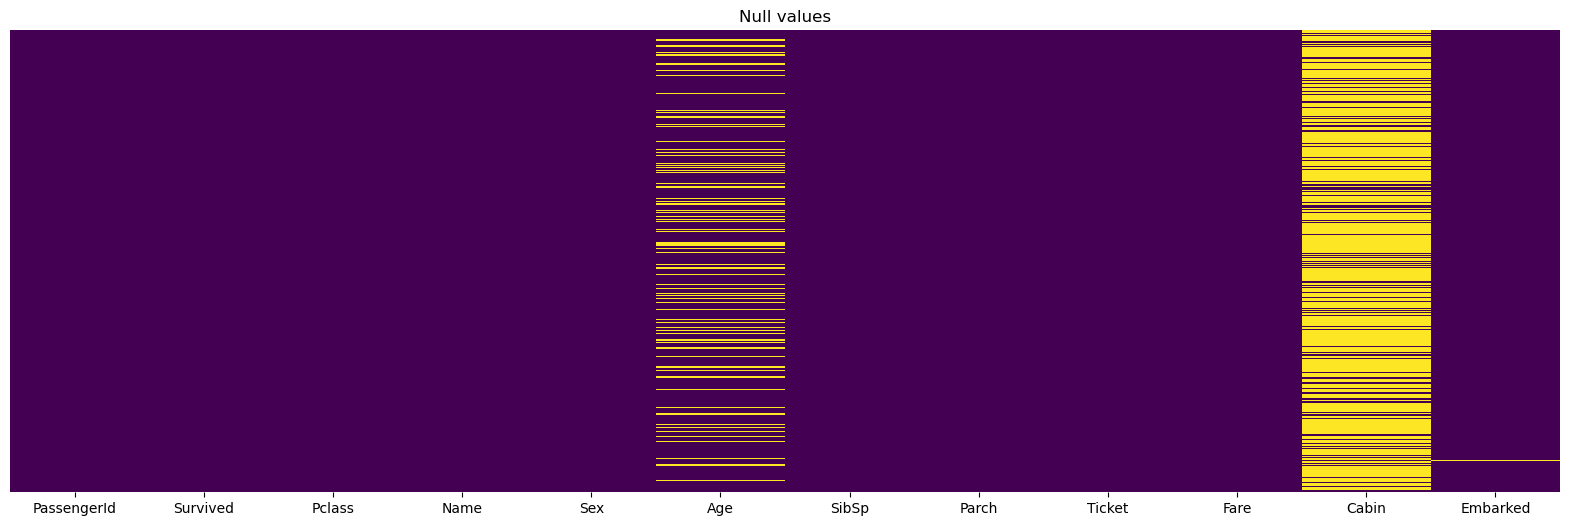

In [80]:
plt.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Null values")